# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [2]:
data1.head()

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240


In [3]:
data2.head()

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560


In [4]:
data1 = data1.iloc[:, 1:]

In [5]:
data2 = data2.iloc[:, 1:]

In [6]:
data2

,X1,X2,y
0,50,B,2510
1,82,B,6738
2,66,B,4355
3,35,A,2225
4,81,A,7560
...,...,...,...
95,98,B,9615
96,9,A,1066
97,56,A,4139
98,50,B,2502


In [7]:
categorical_cols = ['X2']
temp_data2 = pd.get_dummies(data2, columns=categorical_cols, drop_first=True)


In [8]:
temp_data2

,X1,y,X2_B
0,50,2510,1
1,82,6738,1
2,66,4355,1
3,35,2225,0
4,81,7560,0
...,...,...,...
95,98,9615,1
96,9,1066,0
97,56,4139,0
98,50,2502,1


In [9]:
from sklearn.model_selection import train_test_split

X = data1['X']
y = data1['y']
test_size = 0.2
random_state = 43

# Split the data into training and testing sets
indices = range(len(X))
train_indices, test_indices = train_test_split(indices, test_size=test_size, random_state=random_state)

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

In [10]:
X = temp_data2[['X1', 'X2_B']]
y = temp_data2['y']

# set the test size to 20% and the random state to 42
test_size = 0.20
random_state = 42

# split the data into training and testing sets using train_test_split
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [11]:
from sklearn.linear_model import ElasticNetCV

# Set the hyperparameters for the ElasticNetCV model
params = {
    'l1_ratio': [.1, .3, .5,.9, .93, .98, 1],
    'eps': 0.001,
    'n_alphas': 100,
    'max_iter': 10000000
}


elastic_model = ElasticNetCV(**params)

In [12]:
elastic_model.fit(X_train.values.reshape(-1, 1), y_train.values)

ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.9, 0.93, 0.98, 1], max_iter=10000000)

In [13]:
predictions = elastic_model.predict(X_test.values.reshape(-1, 1))
predictions

array([ -0.85301398, 196.37279982,   8.24971589,  23.42093233,
        56.79760852, 153.89339377, 199.40704311,  44.66063536,
       102.31125786, 102.31125786, 169.06461022, 178.16734009,
       126.58520417, 147.8249072 ,  87.14004141, 202.4412864 ,
       169.06461022, 244.92069245, 293.46858508, 269.19463877])

In [14]:
params = {
    'l1_ratio': [.1, .3, .5,.9, .93, .98, 1],
    'eps': 0.001,
    'n_alphas': 100,
    'max_iter': 10000000
}


elastic_model_two = ElasticNetCV(**params)

In [15]:

elastic_model_two.fit(X_train_one,y_train_one)

ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.9, 0.93, 0.98, 1], max_iter=10000000)

In [16]:
elastic_model.l1_ratio_

1.0

In [17]:
score = elastic_model.score(X_test.values.reshape(-1, 1), y_test.values)
score

0.9834299080604024

In [18]:
score_1 = elastic_model_two.score(X_test_one[['X1','X2_B']], y_test_one)
score_1

0.9212569072397924

In [19]:
y_pred = elastic_model.predict(X_test.values.reshape(-1, 1))
residuals = y_pred - y_test.values

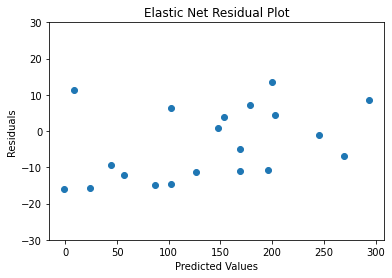

In [20]:
import matplotlib.pyplot as plt

y_pred = elastic_model.predict(X_test.values.reshape(-1, 1))
residuals = y_pred - y_test.values

plt.scatter(y_pred, residuals)
plt.title('Elastic Net Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-30, 30)
plt.show()

In [21]:
y_pred_model_two = elastic_model_two.predict(np.array(X_test_one))
model_two_residual =  y_pred_model_two - y_test_one

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


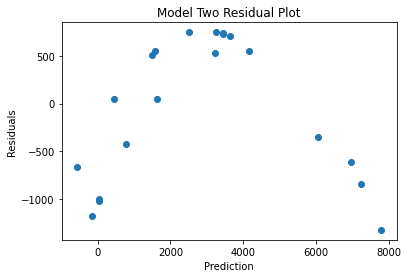

In [22]:
plt.scatter(y_pred_model_two,model_two_residual)
plt.title('Model Two Residual Plot')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()